In [297]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline


In [298]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


y = 1, it's a 'cat' picture.


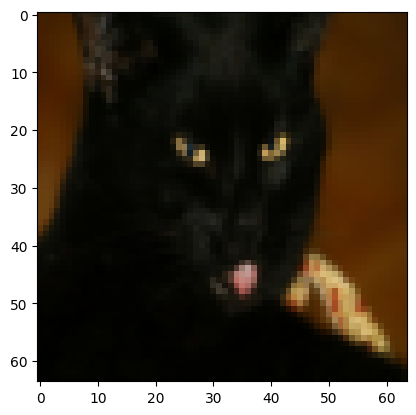

In [299]:
# Example of a picture
index =38
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [300]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [301]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [302]:

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [303]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    
    return s

In [304]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))


sigmoid([0, 2]) = [0.5        0.88079708]


In [305]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [306]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))


w = [[0.]
 [0.]]
b = 0


In [307]:
def propagate(w, b, X, Y):    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X) + b)             
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  
    
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [308]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [309]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [310]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


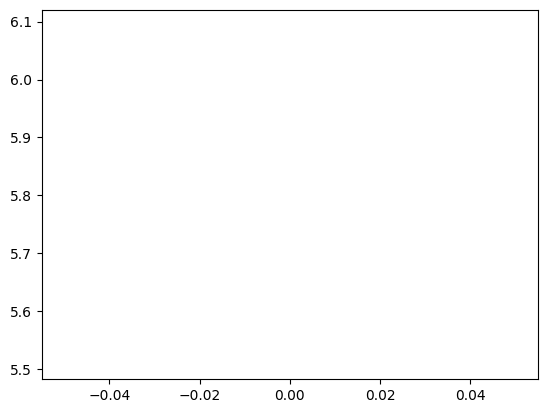

In [311]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [312]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    
    A = sigmoid(np.dot(w.T,X) + b)           
    
    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [313]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))


predictions = [[1. 1. 0.]]


In [314]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [315]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)


train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


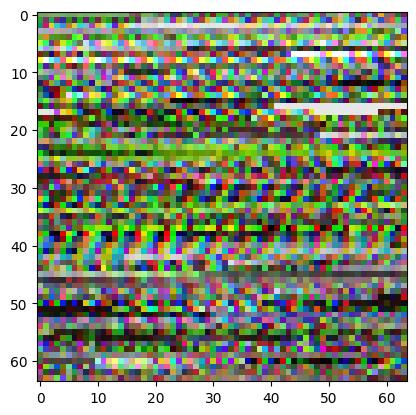

In [316]:
index = 25
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

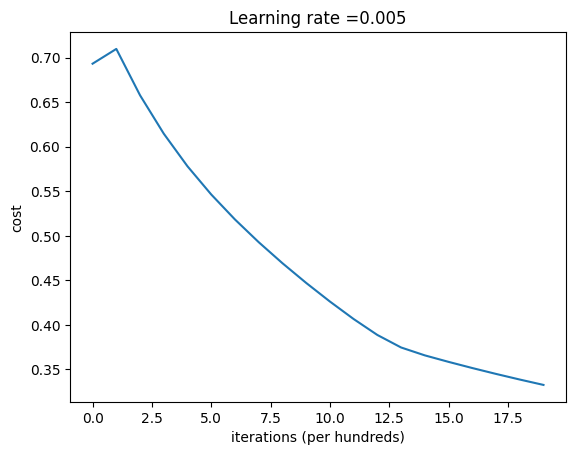

In [317]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 71.29186602870814 %
test accuracy: 64.0 %

**********************************************************************************

learning rate is: 0.001
train accuracy: 74.16267942583733 %
test accuracy: 34.0 %

**********************************************************************************

learning rate is: 0.0001
train accuracy: 66.02870813397129 %
test accuracy: 34.0 %

**********************************************************************************



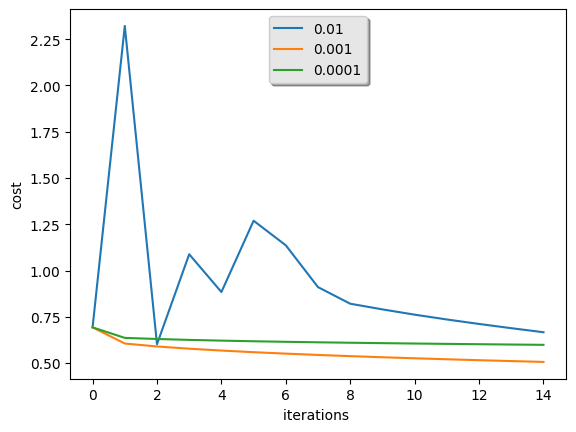

In [318]:
learning_rates=[0.01,0.001,0.0001]
models={}
for i in learning_rates:
    print("learning rate is: "+ str(i))
    models[str(i)]= model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=1500,learning_rate=i,print_cost=False)
    print('\n'+ "**********************************************************************************"+ '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]),label=str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations ')
legend=plt.legend(loc='upper center', shadow=True)
frame=legend.get_frame()
frame.set_facecolor('0.9')
plt.show()


In [320]:
import imageio.v2 as imageio
from skimage.transform import resize
my_image="download.jpg"
fname="images/"+ my_image
image = imageio.imread(fname)
image=image/255.0
my_image = resize(image, (num_px, num_px,3), preserve_range=True)
my_image = my_image.reshape((1, num_px * num_px * 3))
###my_pred_image=predict(d["w"],d["b"], my_image)
    #plt.imshow(image)
    #print("y= "+str(np.squeeze(my_pred_image))+", your algo predicts a \""+ classes[int(np.squeeze(my_pred_image)),].decode("utf-8")+ "\" picture.")###

In [321]:
print("resized image shape:", my_image.shape)


resized image shape: (1, 12288)


In [323]:
#my_pred_image=predict(d["w"],d["b"], my_image)
#plt.imshow(image)
#print("y= "+str(np.squeeze(my_pred_image))+", your algo predicts a \""+ classes[int(np.squeeze(my_pred_image)),].decode("utf-8")+ "\" picture.")